# Heart Attack Dataset

## 0. Introdução

A análise a seguir foi feita com o objetivo de determinar quais são as pessoas que tem mais chance de ter ataque cardíaco. Vamos analisar se a idade e gênero são fatores determinantes, por exemplo, e também se a glicemia, colesterol e etc exercem influência.  


link: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.get_option('display.max_columns')

pd.set_option("display.max_rows", 150)
pd.get_option("display.max_rows")

import sys
import warnings

warnings.filterwarnings('ignore')

sns.set()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1. Análise de dados

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().mean()

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

### 1.1 Análise Univariada

<AxesSubplot:title={'center':'Eita bicho sexo kk'}, xlabel='sex'>

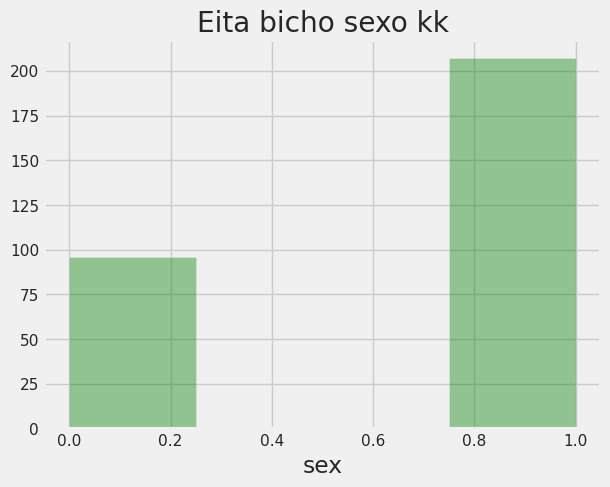

In [20]:
plt.title('Eita bicho sexo kk')
sns.distplot(df['sex'], kde=False, color='green')

<AxesSubplot:xlabel='age'>

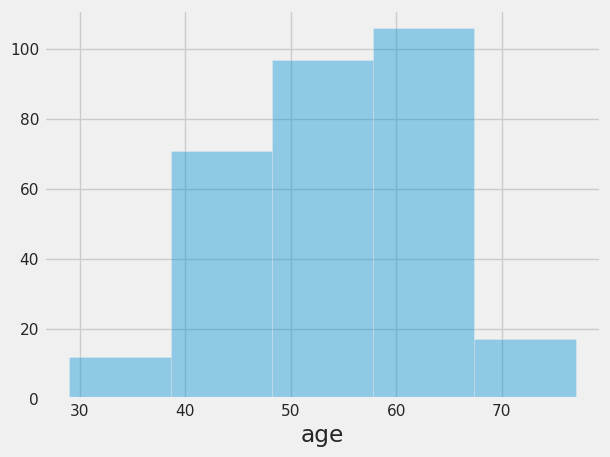

In [11]:
sns.distplot(df['age'], kde=False, bins=5)

<AxesSubplot:xlabel='chol'>

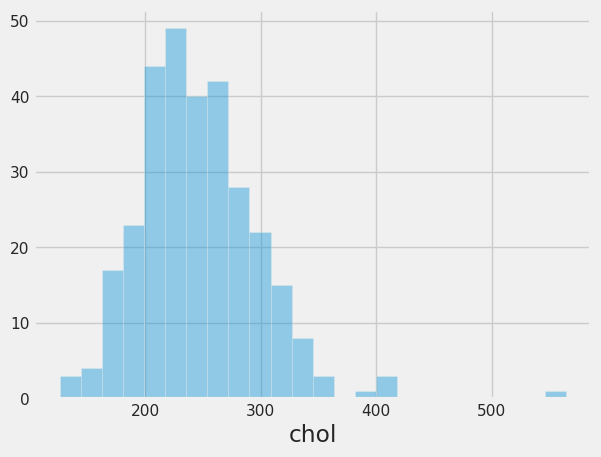

In [14]:
sns.distplot(df['chol'], kde=False)

<AxesSubplot:xlabel='output'>

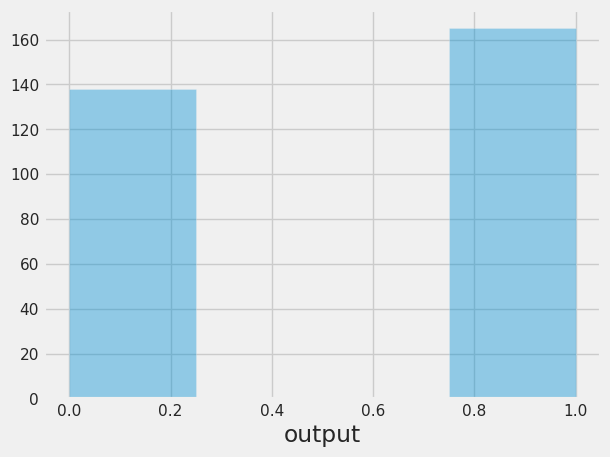

In [15]:
sns.distplot(df['output'], kde=False)

In [41]:
df['chol'].min()

126

### 1.2 Análise Bivariada

<AxesSubplot:xlabel='sex', ylabel='count'>

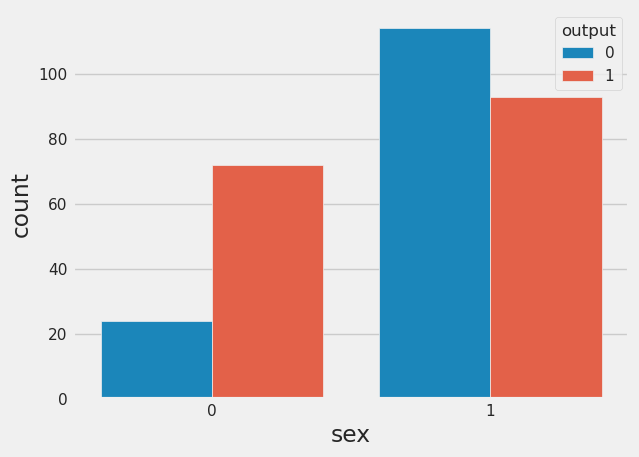

In [35]:
sns.countplot(df['sex'], hue=df['output'])

<AxesSubplot:xlabel='cp', ylabel='count'>

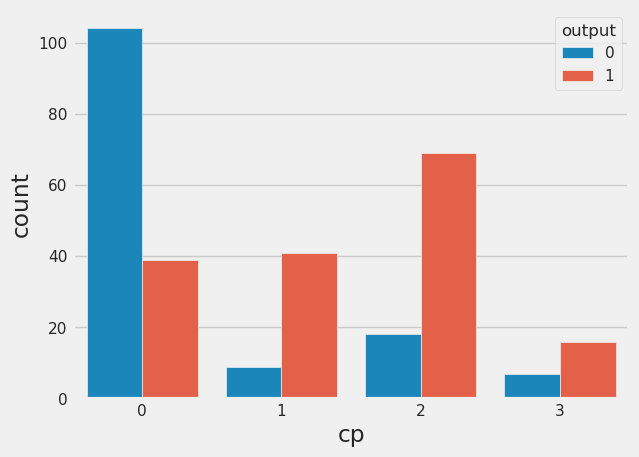

In [16]:
sns.countplot(df['cp'], hue=df['output'])

<AxesSubplot:xlabel='restecg', ylabel='count'>

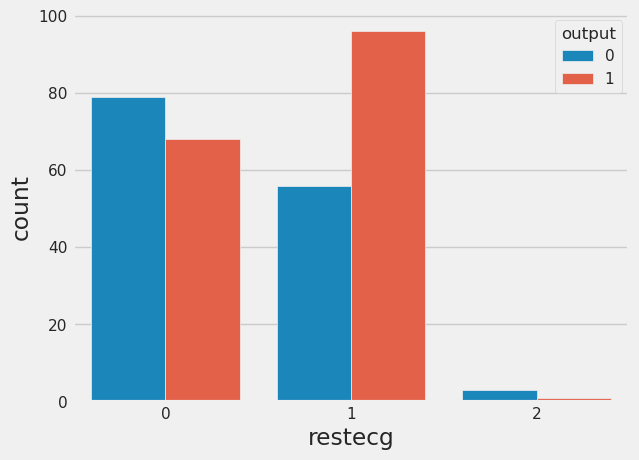

In [17]:
sns.countplot(df['restecg'], hue=df['output'])

In [26]:
df.groupby(['sex'])['output'].mean()

sex
0    0.750000
1    0.449275
Name: output, dtype: float64

In [31]:
df.groupby(['output']).count()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,AgeGroup
output,,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165,165,165,165,165


<AxesSubplot:xlabel='output', ylabel='age'>

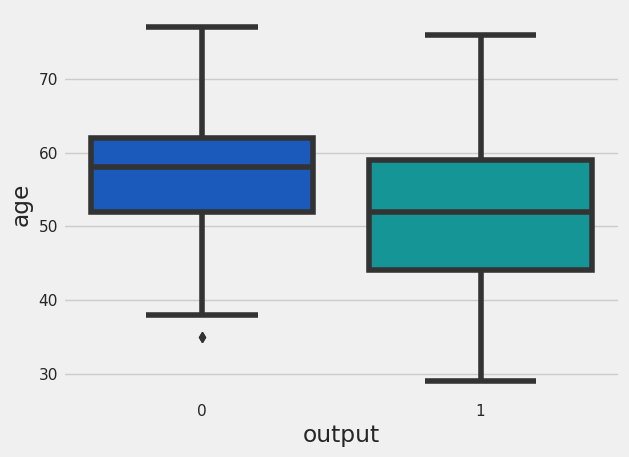

In [33]:
sns.boxplot(x='output',y='age',data=df,palette='winter')

<AxesSubplot:xlabel='output', ylabel='chol'>

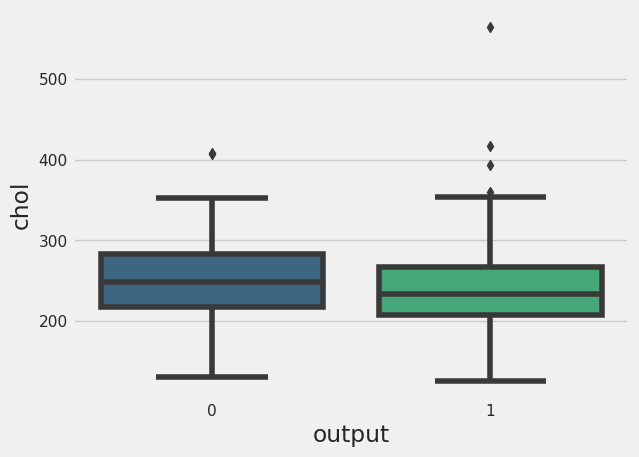

In [52]:
sns.boxplot(x='output',y='chol',data=df,palette='viridis')

<AxesSubplot:xlabel='fbs', ylabel='count'>

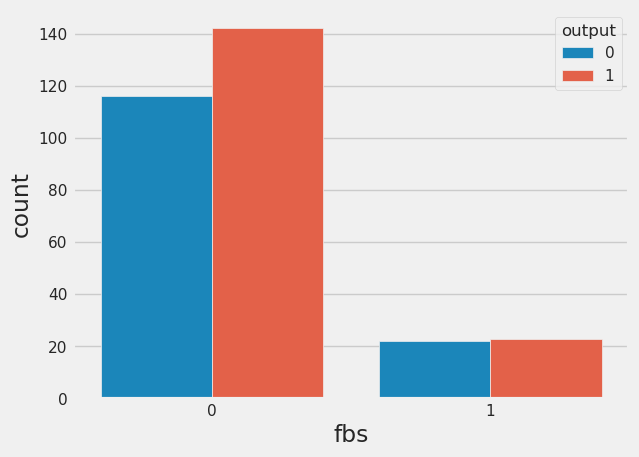

In [54]:
sns.countplot(df['fbs'], hue=df['output'])

## 2. Criação do Modelo

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop('output', axis=1)
y = df['output'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #Separando os dados de teste

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=101)

pipe = Pipeline([
                (('modelo', rf))
                ])

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

scores = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')

np.mean(scores)

0.7897108843537415